In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import re
import sklearn
#import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
#from prettytable import PrettyTable

In [2]:
data = pd.read_csv(r"C:\Users\vaide\OneDrive\Desktop\Nashville_housing_data_2013_2016.csv")

In [3]:
data

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

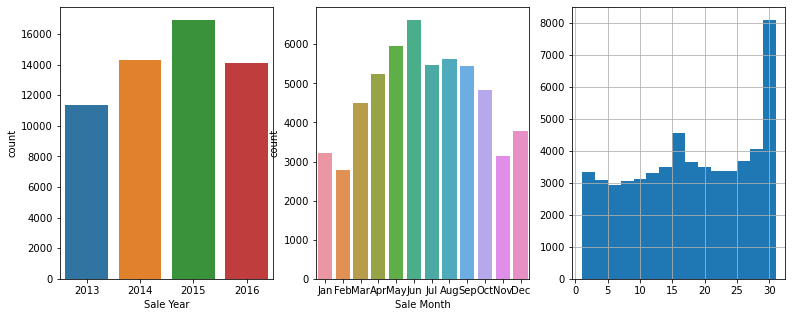

In [4]:
data['Sale Year'] = data['Sale Date'].str[:4]
data['Month'] = data['Sale Date'].str[5:7]
data['Day'] = data['Sale Date'].str[8:10]
data['Sale Month'] = data.Month.map({'01': 'Jan', '02': 'Feb', '03': 'Mar', '04':'Apr','05': 'May',
                                           '06': 'Jun','07': 'Jul','08': 'Aug','09': 'Sep','10': 'Oct',
                                           '11': 'Nov','12': 'Dec'})
data['Sale Day'] = data.Day.astype(float)
data.drop('Month', axis=1)
data.drop('Day', axis=1)

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(13,5))
sns.countplot(x='Sale Year', data=data, ax = axis1)
sns.countplot(x='Sale Month', data=data, ax = axis2)
data['Sale Day'].hist(bins = 15, ax= axis3)

In [5]:
data['Property City'].value_counts()

NASHVILLE         40280
ANTIOCH            6316
HERMITAGE          3133
MADISON            2114
BRENTWOOD          1696
OLD HICKORY        1415
GOODLETTSVILLE      735
NOLENSVILLE         494
MOUNT JULIET        183
WHITES CREEK         97
JOELTON              11
FRANKLIN              1
BELLEVUE              1
UNKNOWN               1
Name: Property City, dtype: int64

In [6]:
data['Land Use'].value_counts()

SINGLE FAMILY                                 34268
RESIDENTIAL CONDO                             14081
VACANT RESIDENTIAL LAND                        3586
VACANT RES LAND                                1575
DUPLEX                                         1389
ZERO LOT LINE                                  1049
CONDO                                           252
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
SPLIT CLASS                                      17
VACANT COMMERCIAL LAND                           17
PARKING LOT                                      11
FOREST                                           10
GREENBELT                                        10
PARSONAGE   

[Text(0, 0.5, 'Sale Price')]

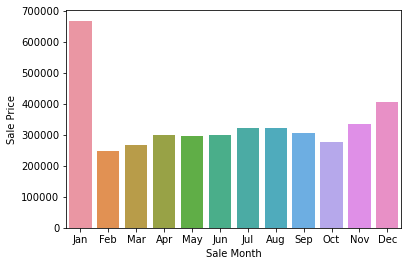

In [7]:
sale_month = data[["Sale Month", "Sale Price"]].groupby(['Sale Month'], as_index = False).mean()
sns.barplot(x= 'Sale Month', y = 'Sale Price', data=sale_month, 
            order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(ylabel='Sale Price')

In [8]:
data=data.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Suite/ Condo   #','image'])
data.isnull().sum()

Parcel ID                                0
Land Use                                 0
Property Address                       159
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade      

In [9]:
## Categorical variables
categor_data = data.select_dtypes(exclude="number")
categor_data.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Tax District,Foundation Type,Exterior Wall,Grade,Sale Year,Month,Day,Sale Month
0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,NASHVILLE,2013-01-24,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,01,24,Jan
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,URBAN SERVICES DISTRICT,PT BSMT,BRICK,C,2013,01,11,Jan
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,CITY OF BERRY HILL,SLAB,BRICK/FRAME,C,2013,01,18,Jan
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN,URBAN SERVICES DISTRICT,FULL BSMT,BRICK/FRAME,B,2013,01,18,Jan
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,URBAN SERVICES DISTRICT,CRAWL,FRAME,C,2013,01,23,Jan


In [10]:
## Numerical variables
numeric_data = data.select_dtypes(exclude="object")
numeric_data.head()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Day
0,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
1,191500,0.17,3127.0,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,11.0
2,202000,0.11,9126.0,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0,18.0
3,32000,0.17,3130.0,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,18.0
4,102000,0.34,3130.0,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,23.0


Text(123.0, 0.5, 'Features')

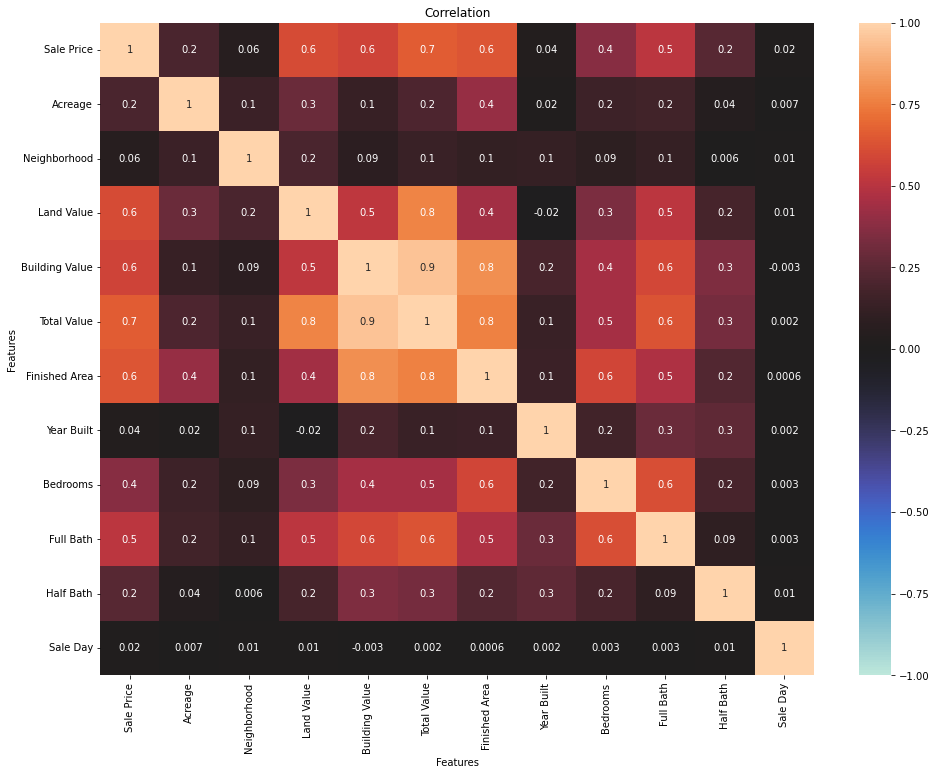

In [11]:
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
ax = sns.heatmap(data.corr(), annot = True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

In [12]:
data = data.fillna(data.mode().iloc[0])
data['Multiple Parcels Involved in Sale']= data['Multiple Parcels Involved in Sale'].rank(method='dense', ascending=False).astype(int)
data['Multiple Parcels Involved in Sale'].value_counts()

2    51947
1     4689
Name: Multiple Parcels Involved in Sale, dtype: int64

In [13]:
to_replace = ['TCC|IDC|AAB|AAC|OFC|SRC|SSC|SRD|TFC|TCB|TAC|OMB|OFB|TCD']
replace_with = ['OTHER']
data=data.replace(to_replace, replace_with, regex=True)
data['Grade'] = data['Grade'].rank(method='dense', ascending=False).astype(int)
data['Grade'].value_counts()

5    49733
6     3698
4     1984
7      598
1      523
3       60
2       40
Name: Grade, dtype: int64

In [14]:
to_replace = ['QUADPLEX|TRIPLEX|RESIDENTIAL COTHERO/MISC|CONDOMINIUM OTHER  OR OTHER COM CONDO|CHURCH|MOBILE HOME|DORMITORY/BOARDING HOUSE|SPLIT CLASS|VACANT COMMERCIAL LAND|PARKING LOT|FOREST|GREENBELT|PARSONAGE|VACANT RESIENTIAL LAND|DAY CARE CENTER|NON-PROFIT CHARITABLE SERVICE|TERMINAL/DISTRIBUTION WAREHOUSE|VACANT ZONED MULTI FAMILY|RESTURANT/CAFETERIA|VACANT RURAL LAND|LIGHT MANUFACTURING|ONE STORY GENERAL RETAIL STORE|CLUB/UNION HALL/LODGE|CONVENIENCE MARKET WITHOUT GAS|SMALL SERVICE SHOP|STRIP SHOPPING CENTER|METRO OTHER THAN OTHER, SCHOOL,HOSP, OR PARK|NIGHTCLUB/LOUNGE|MORTUARY/CEMETERY|OTHER/RES\r\nGRRENBELT/RES|APARTMENT: LOW RISE \(BUILT SINCE 1960\)|OFFICE BLDG \(ONE OR TWO STORIES\)']
replace_with = ['OTHER']
data=data.replace(to_replace, replace_with, regex=True)
data['Land Use'].value_counts()

SINGLE FAMILY                 34268
RESIDENTIAL CONDO             14081
VACANT RESIDENTIAL LAND        3586
VACANT RES LAND                1575
DUPLEX                         1389
ZERO LOT LINE                  1049
OTHER                           433
CONDO                           252
OTHER/RES\r\nGRRENBELT/RES        3
Name: Land Use, dtype: int64

In [15]:
to_replace = ['OTHER/RES\r\nGRRENBELT/RES']
replace_with = ['OTHER']
data=data.replace(to_replace, replace_with, regex=True)
data['Land Use'] = data['Land Use'].rank(method='dense', ascending=False).astype(int)
data['Land Use'].value_counts()

4    34268
5    14081
2     3586
3     1575
7     1389
1     1049
6      436
8      252
Name: Land Use, dtype: int64

In [16]:
to_replace = ['UNKNOWN|FRANKLIN']
replace_with = ['OTHER']
data=data.replace(to_replace, replace_with, regex=True)
data['Property City'] = data['Property City'].rank(method='dense', ascending=False).astype(int)
data['Property City'].value_counts()

5     40439
13     6316
9      3133
7      2114
11     1696
3      1415
10      735
4       494
6       183
1        97
8        11
2         2
12        1
Name: Property City, dtype: int64

In [17]:
to_replace = ['WHITES CREEK|JOELTON|MOUNT JULIET|NOLENSVILLE|BELLEVUE']
replace_with = ['OTHER']
data=data.replace(to_replace, replace_with, regex=True)
data['City'] = data['City'].rank(method='dense', ascending=False).astype(int)
data['City'].value_counts()

3    51322
8     1311
4     1309
5     1055
2      919
6      472
7      203
1       45
Name: City, dtype: int64

In [18]:
data['Exterior Wall'] = data['Exterior Wall'].rank(method='dense', ascending=False).astype(int)

data['Foundation Type'] = data['Foundation Type'].rank(method='dense', ascending=False).astype(int)

data['Tax District'] = data['Tax District'].rank(method='dense', ascending=False).astype(int)

data['Sold As Vacant']=data['Sold As Vacant'].map({'No': 0, 'Yes': 1})
data['State']=data['State'].map({ 'TN': 1})

In [19]:
data= data.drop(columns = ['Parcel ID','Owner Name','Sale Date','Legal Reference','Address','Property Address'])
X = data.drop(columns = ['Sale Price'])
y =data['Sale Price']
X.shape
y.shape

(56636,)

In [20]:
data

,Land Use,Property City,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,...,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Month,Day,Sale Month,Sale Day
0,5,5,132000,0,2,3,1,0.17,1,4026.0,...,10,5,3.0,2.0,0.0,2013,01,24,Jan,24.0
1,4,5,191500,0,2,3,1,0.17,1,3127.0,...,10,5,2.0,1.0,0.0,2013,01,11,Jan,11.0
2,4,5,202000,0,2,3,1,0.11,6,9126.0,...,9,5,3.0,2.0,1.0,2013,01,18,Jan,18.0
3,4,5,32000,0,2,3,1,0.17,1,3130.0,...,9,6,4.0,2.0,0.0,2013,01,18,Jan,18.0
4,4,5,102000,0,2,3,1,0.34,1,3130.0,...,7,5,2.0,1.0,0.0,2013,01,23,Jan,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,5,5,210000,0,2,3,1,0.17,1,4026.0,...,10,5,3.0,2.0,0.0,2016,10,06,Oct,6.0
56632,5,5,338000,0,2,3,1,0.17,1,4026.0,...,10,5,3.0,2.0,0.0,2016,10,25,Oct,25.0
56633,5,5,742000,0,2,3,1,0.17,1,4026.0,...,10,5,3.0,2.0,0.0,2016,10,04,Oct,4.0
56634,5,5,320000,0,2,3,1,0.17,1,4026.0,...,10,5,3.0,2.0,0.0,2016,10,26,Oct,26.0


In [21]:
data.dtypes

Land Use                               int32
Property City                          int32
Sale Price                             int64
Sold As Vacant                         int64
Multiple Parcels Involved in Sale      int32
City                                   int32
State                                  int64
Acreage                              float64
Tax District                           int32
Neighborhood                         float64
Land Value                           float64
Building Value                       float64
Total Value                          float64
Finished Area                        float64
Foundation Type                        int32
Year Built                           float64
Exterior Wall                          int32
Grade                                  int32
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Year                             object
Month     

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
data= data.drop(columns = ['Month','Day','Sale Month','Sale Year'])

In [24]:
data

,Land Use,Property City,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,...,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Day
0,5,5,132000,0,2,3,1,0.17,1,4026.0,...,11000.0,1100.00000,6,1950.0,10,5,3.0,2.0,0.0,24.0
1,4,5,191500,0,2,3,1,0.17,1,3127.0,...,168300.0,1149.00000,3,1941.0,10,5,2.0,1.0,0.0,11.0
2,4,5,202000,0,2,3,1,0.11,6,9126.0,...,191800.0,2090.82495,2,2000.0,9,5,3.0,2.0,1.0,18.0
3,4,5,32000,0,2,3,1,0.17,1,3130.0,...,268700.0,2145.60001,5,1948.0,9,6,4.0,2.0,0.0,18.0
4,4,5,102000,0,2,3,1,0.34,1,3130.0,...,164800.0,1969.00000,6,1910.0,7,5,2.0,1.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,5,5,210000,0,2,3,1,0.17,1,4026.0,...,11000.0,1100.00000,6,1950.0,10,5,3.0,2.0,0.0,6.0
56632,5,5,338000,0,2,3,1,0.17,1,4026.0,...,11000.0,1100.00000,6,1950.0,10,5,3.0,2.0,0.0,25.0
56633,5,5,742000,0,2,3,1,0.17,1,4026.0,...,11000.0,1100.00000,6,1950.0,10,5,3.0,2.0,0.0,4.0
56634,5,5,320000,0,2,3,1,0.17,1,4026.0,...,11000.0,1100.00000,6,1950.0,10,5,3.0,2.0,0.0,26.0


In [25]:
data.dtypes 

Land Use                               int32
Property City                          int32
Sale Price                             int64
Sold As Vacant                         int64
Multiple Parcels Involved in Sale      int32
City                                   int32
State                                  int64
Acreage                              float64
Tax District                           int32
Neighborhood                         float64
Land Value                           float64
Building Value                       float64
Total Value                          float64
Finished Area                        float64
Foundation Type                        int32
Year Built                           float64
Exterior Wall                          int32
Grade                                  int32
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Day                             float64
dtype: obj

In [26]:
calc_vif(data)

,variables,VIF
0,Land Use,1.464975
1,Property City,1.422284
2,Sale Price,1.136649
3,Sold As Vacant,1.752131
4,Multiple Parcels Involved in Sale,1.497978
5,City,1.562207
6,State,16020.355562
7,Acreage,1.185406
8,Tax District,2.362537
9,Neighborhood,1.946433


In [27]:
data = data.drop(['Finished Area' ], axis = 1)
calc_vif(data)

,variables,VIF
0,Land Use,1.457151
1,Property City,1.417375
2,Sale Price,1.135968
3,Sold As Vacant,1.750293
4,Multiple Parcels Involved in Sale,1.497411
5,City,1.562167
6,State,15961.695034
7,Acreage,1.164966
8,Tax District,2.362348
9,Neighborhood,1.944754


# Logistic Regression model¶

In [28]:
y = data['Sold As Vacant']
x = data.drop(['Sold As Vacant'], axis = 1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [30]:
import statsmodels.api as sm  
log_model = sm.Logit(y_train, x_train).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.135859
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         Sold As Vacant   No. Observations:                39645
Model:                          Logit   Df Residuals:                    39625
Method:                           MLE   Df Model:                           19
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.5429
Time:                        19:34:20   Log-Likelihood:                -5386.1
converged:                       True   LL-Null:                       -11785.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Land Use                             -1.4928      0.025    -5

In [31]:
p_val = pd.DataFrame(log_model.pvalues, columns=['p_value'])
coef = pd.DataFrame(log_model.params, columns= ['coef'])
p_coef = pd.concat([coef, p_val], axis = 1)
p_coef

,coef,p_value
Land Use,-1.492842,0.000000e+00
Property City,0.046743,4.339714e-07
Sale Price,-0.000002,1.076441e-84
Multiple Parcels Involved in Sale,-3.312853,0.000000e+00
City,-0.330387,4.427123e-14
State,-26.686336,2.069135e-08
Acreage,0.144245,2.189609e-06
Tax District,0.032640,6.522001e-01
Neighborhood,-0.000212,5.440379e-14
Land Value,0.000082,6.756512e-45


In [32]:
print(p_coef[p_coef['p_value'] < 0.05].sort_values('coef', ascending=False))

                                        coef       p_value
Bedrooms                            0.788977  2.452965e-30
Foundation Type                     0.607060  1.056073e-22
Exterior Wall                       0.157006  1.071051e-05
Acreage                             0.144245  2.189609e-06
Property City                       0.046743  4.339714e-07
Year Built                          0.014711  6.876462e-10
Land Value                          0.000082  6.756512e-45
Building Value                      0.000076  8.143955e-38
Sale Price                         -0.000002  1.076441e-84
Total Value                        -0.000076  1.240259e-39
Neighborhood                       -0.000212  5.440379e-14
Sale Day                           -0.005760  4.715015e-02
City                               -0.330387  4.427123e-14
Half Bath                          -0.608959  5.524941e-07
Land Use                           -1.492842  0.000000e+00
Multiple Parcels Involved in Sale  -3.312853  0.000000e+

In [33]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report and Confusion Matrix
LogisticRegression()
model=LogisticRegression(solver='liblinear',random_state=0).fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Confusion Matrix\n",confusion_matrix(y_test, model.predict(x_test)))

Confusion Matrix
 [[15573     1]
 [ 1416     1]]


In [34]:
print("Classification Report\n",classification_report(y_test, model.predict(x_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15574
           1       0.50      0.00      0.00      1417

    accuracy                           0.92     16991
   macro avg       0.71      0.50      0.48     16991
weighted avg       0.88      0.92      0.88     16991



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.917
Precision: 0.500
Recall: 0.001


In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.083


In [37]:
!pip install mlxtend

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [39]:
log_reg = LogisticRegression()
sfs1 = sfs(log_reg, k_features=3, forward=True, verbose = 2, scoring='accuracy', cv = 5)
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.4s finished

[2022-06-26 19:37:46] Features: 1/3 -- score: 0.9382015386555681[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.6s finished

[2022-06-26 19:37:55] Features: 2/3 -- score: 0.9396897465001892[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   10.8s finished

[2022-06-26 19:38:06] Features: 3/3 -- score: 0.9408500441417582

In [40]:
sig_cols = list(sfs1.k_feature_names_)
print(sig_cols)

['Land Use', 'City', 'Foundation Type']


In [41]:
log_reg_1 = LogisticRegression()
model = log_reg_1.fit(x_train[sig_cols], y_train)
print(confusion_matrix(y_test, model.predict(x_test[sig_cols])))
print(classification_report(y_test, model.predict(x_test[sig_cols])))
print('Accuracy: %.3f' % accuracy_score(y_test, model.predict(x_test[sig_cols])))

[[15132   442]
 [  613   804]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     15574
           1       0.65      0.57      0.60      1417

    accuracy                           0.94     16991
   macro avg       0.80      0.77      0.79     16991
weighted avg       0.93      0.94      0.94     16991

Accuracy: 0.938


# Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfclass=RandomForestClassifier(n_estimators=20, random_state=0)
rfclass.fit(x_train, y_train)
rfypred=rfclass.predict(x_test)
x_train

,Land Use,Property City,Sale Price,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Day
50599,4,5,178000,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,27.0
25831,4,5,174679,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,23.0
18984,5,5,504000,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,28.0
38748,5,5,322500,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,24.0
23453,4,5,285000,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,5,5,345000,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,17.0
32511,4,5,350000,2,3,1,0.29,1,1627.0,90000.0,185400.0,281300.0,3,1909.0,7,5,2.0,1.0,0.0,26.0
5192,5,11,229000,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,30.0
12172,5,5,279000,2,3,1,0.17,1,4026.0,25000.0,0.0,11000.0,6,1950.0,10,5,3.0,2.0,0.0,14.0


In [43]:
print("Accuracy: ", accuracy_score(y_test, rfypred))
rfclass.score(x_test, y_test)

Accuracy:  0.9785768936495792


0.9785768936495792

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, rfypred))
print('Precision: %.3f' % precision_score(y_test, rfypred))
print('Recall: %.3f' % recall_score(y_test, rfypred))

Accuracy: 0.979
Precision: 0.881
Recall: 0.859


# Gradient Boost model

In [45]:
gbclass= GradientBoostingClassifier(random_state=0)
gbclass.fit(x_train, y_train)
gbypred=gbclass.predict(x_test)


In [46]:
gbclass.score(x_test, y_test)

0.972691424871991

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, gbypred))
print('Precision: %.3f' % precision_score(y_test, gbypred))
print('Recall: %.3f' % recall_score(y_test, gbypred))

Accuracy: 0.973
Precision: 0.834
Recall: 0.839


# Decision tree

In [53]:
tModel = DecisionTreeClassifier(max_depth=3)
tModel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
yDPred = tModel.predict(x_test)
print(confusion_matrix(y_test, tModel.predict(x_test)))

[[15200   374]
 [  258  1159]]


In [55]:
print('Accuracy: '+str(round(accuracy_score(y_test, yDPred)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_test, yDPred)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_test, yDPred)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(y_test, yDPred)*100,2))+'%')

Accuracy: 96.28%
Precision: 75.6%
Recall: 81.79%
MSE: 3.72%


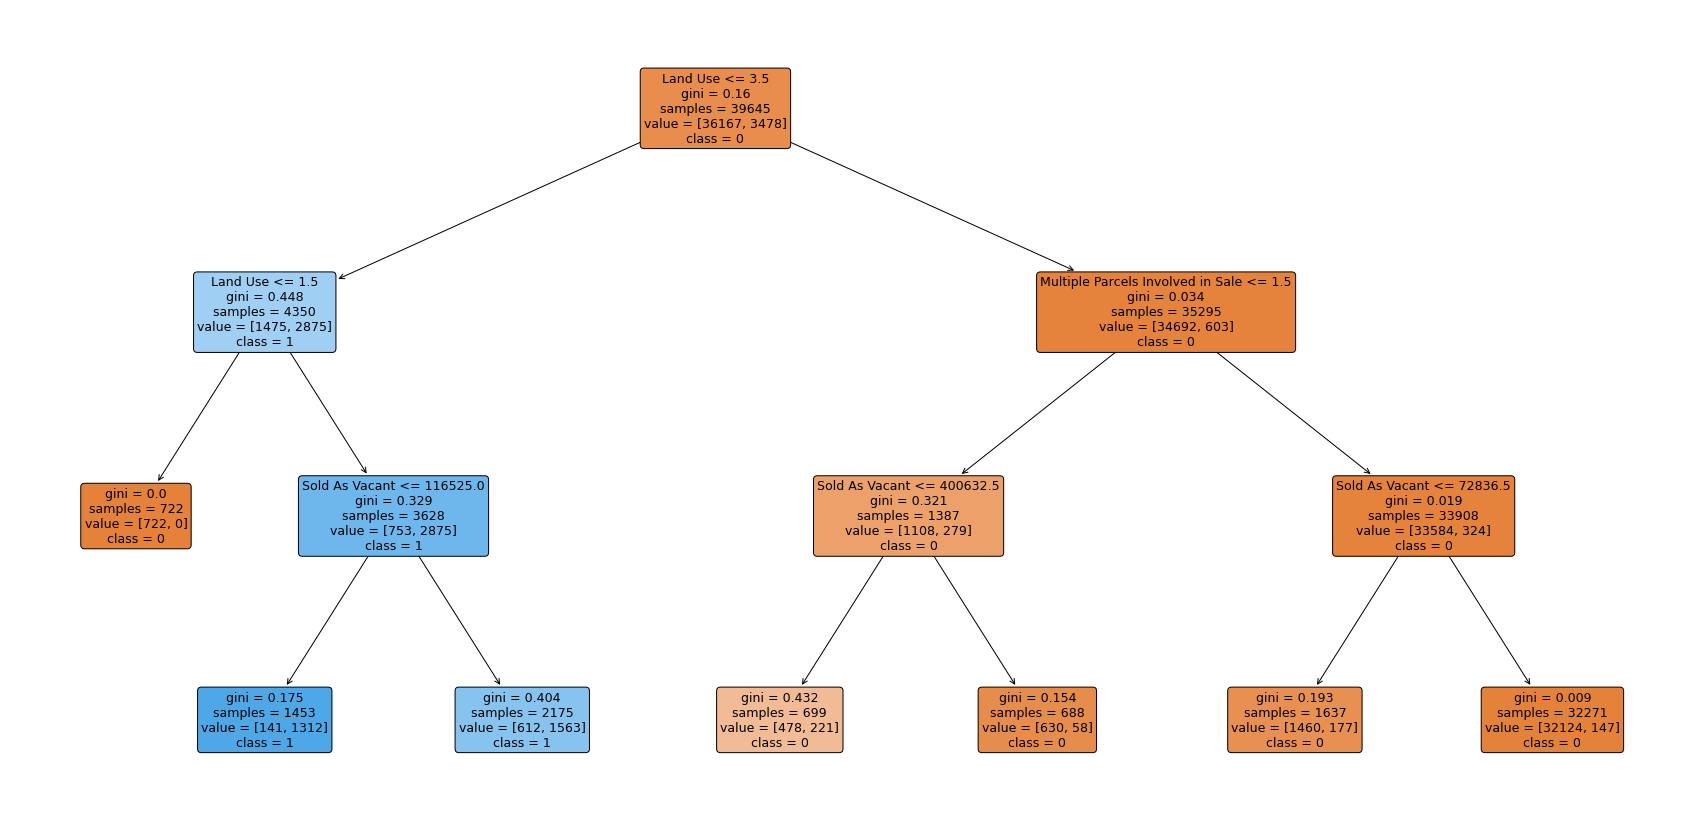

In [57]:
from sklearn import tree
plt.figure(figsize=(30,15))
feature_names = X.columns.values.tolist()
target_names = ['0','1']

tree.plot_tree(tModel, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
plt.savefig('DecisionTreeChocolate.png') 

# Neural Network

In [58]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp= MLPClassifier(3, solver='sgd', learning_rate_init=0.01, max_iter= 10000)
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.9166029074215761

In [59]:
from sklearn.metrics import mean_squared_error
nnpred=mlp.predict(x_test)
mse = mean_squared_error(y_test, nnpred)
print('MSE: %.3f' % mse)

MSE: 0.083


In [60]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp= MLPClassifier(3, solver='sgd', learning_rate_init=0.01, max_iter= 15000)
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.9167206167971279

In [61]:
from sklearn.metrics import mean_squared_error
nnpred=mlp.predict(x_test)
mse = mean_squared_error(y_test, nnpred)
print('MSE: %.3f' % mse)

MSE: 0.083


In [62]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp= MLPClassifier(3, solver='sgd', learning_rate_init=0.01, max_iter= 20000)
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.9166029074215761

In [63]:
from sklearn.metrics import mean_squared_error
nnpred=mlp.predict(x_test)
mse = mean_squared_error(y_test, nnpred)
print('MSE: %.3f' % mse)

MSE: 0.083
